#### This is my first kaggle machine learning practice. I'd love to get any feedbacks for the work and improvements. Please leave a comment if you have any.

# Step 1: Answering the question


#### This project is derived from Kaggle competition. The project is called Bank Churn. The goal is to identify which customer has churned. This is a binary classification problem

# Step 2: Checking Data

In this step, you will:

* Import dataset
* Checking data quality
  * Is there any missing data
  * Is there any duplicates?
  * what are the data types
  * what are the distributions of the data
  * Do we need to remove or fix any data?
* Basic understanding of the dataset
  * The columns
  * Size of the datasets
  * what columns are categorical, what columns are numeircal 

Anything else you can think of



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
test_data = pd.read_csv('test.csv') 
train_data = pd.read_csv('train.csv')

In [5]:
print("The colunms of test dataset are:")
print(test_data.columns)

The colunms of test dataset are:
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [92]:
print("The colunms of train dataset are:")
print(train_data.columns)

The colunms of train dataset are:
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


### Look at training dataset first

In [6]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [94]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [95]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


##### from above information, we can see that:
1. There are no missing values 
2. The data type for all the features are correct
3. We possibily don't need the Id column nor the customer id columb for modelling

# Step 3: Tidying the data

This step is to fix all the problems we have seen from last steps. 

As what we saw in the last step, the data are very clean, so we don't need to tidy up the data here

# Step 4: EDA

In this step, we will do some analysis on the dataset to understand some key information of the data.

You can check:
* Distributions
* Correlations
* Key drivers for solving the problem
* or anything else you want to analyze on

Lets first look at how many people are churned

The percentage of exited customers is: 21.16%


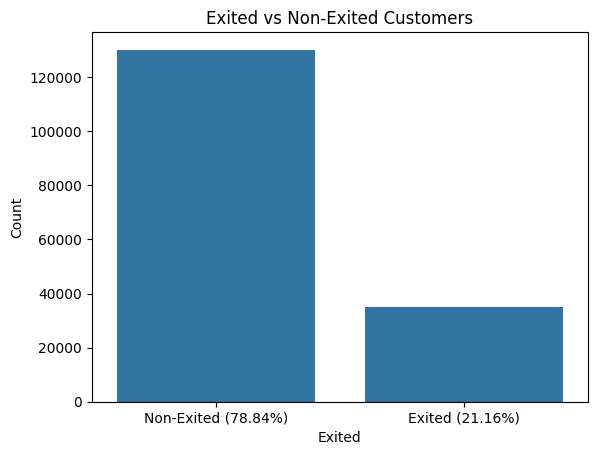

In [7]:
sns.countplot(data=train_data, x='Exited')

exited_percentage = train_data.loc[train_data['Exited'] == 1].shape[0] / train_data.shape[0] * 100
non_exited_percentage = 100 - exited_percentage
print("The percentage of exited customers is: {:.2f}%".format(exited_percentage))

# adding percentage to the graph
plt.title('Exited vs Non-Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Exited ({:.2f}%)'.format(non_exited_percentage), 'Exited ({:.2f}%)'.format(exited_percentage)])

# plotting the graph
plt.show()

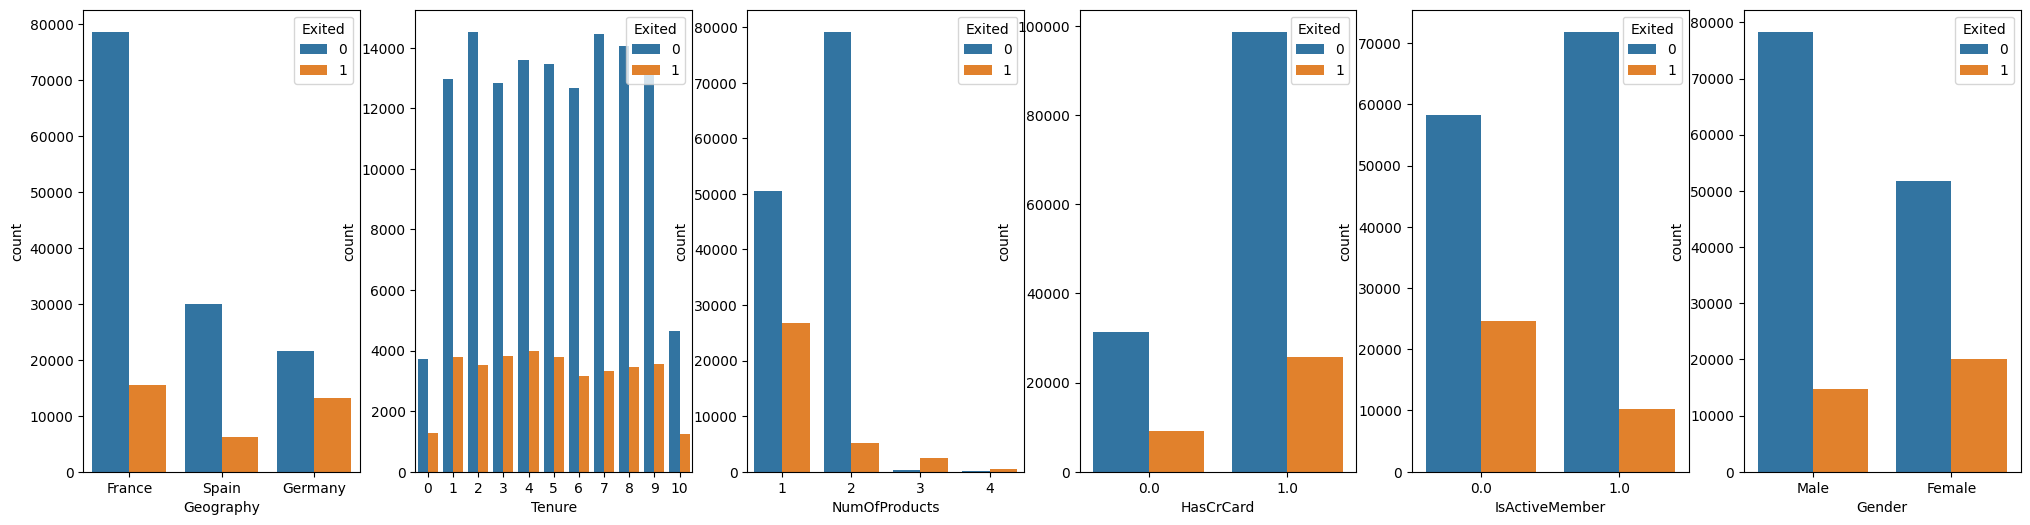

In [8]:
fig, ax = plt.subplots(1, 6, figsize=(25,6))
sns.countplot(x='Geography', hue='Exited', data=train_data, ax=ax[0])
sns.countplot(x='Tenure', hue='Exited', data=train_data, ax=ax[1])
sns.countplot(x='NumOfProducts', hue='Exited', data=train_data, ax=ax[2])
sns.countplot(x='HasCrCard', hue='Exited', data=train_data, ax=ax[3])
sns.countplot(x='IsActiveMember', hue='Exited', data=train_data, ax=ax[4])
sns.countplot(x='Gender', hue='Exited', data=train_data, ax=ax[5])

# for i in range(6):
#     # ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
plt.show()

##### We looked at a few features above, we can see that:
1. Regarding to geography, Germany seems to have more churned customers for the amount of customer they had. France has the most custoemrs
2. Regarding to Tensure, just from this countplot, it's hard to gain the insights, we will need to replot to understand the relationship between tenure and churn
3. Number of products: seems like when customer only has 2 products, it's less likely to churn (this is kinda weird). Customers who have 3-4 products are churned more 
4. we can see there are more customers having credit cards, and they might churn less according to the percentage
5. can't see clearly if active customers are less likely to churn using the countplot
6. There are more male customers, however female customers are more likely to churn

##### Before we dive into the features above, lets look at the consistency data first

/Users/zoechen/Library/Caches/pypoetry/virtualenvs/bank-churn-jzBMeYPH-py3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/zoechen/Library/Caches/pypoetry/virtualenvs/bank-churn-jzBMeYPH-py3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/zoechen/Library/Caches/pypoetry/virtualenvs/bank-churn-jzBMeYPH-py3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future versi

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

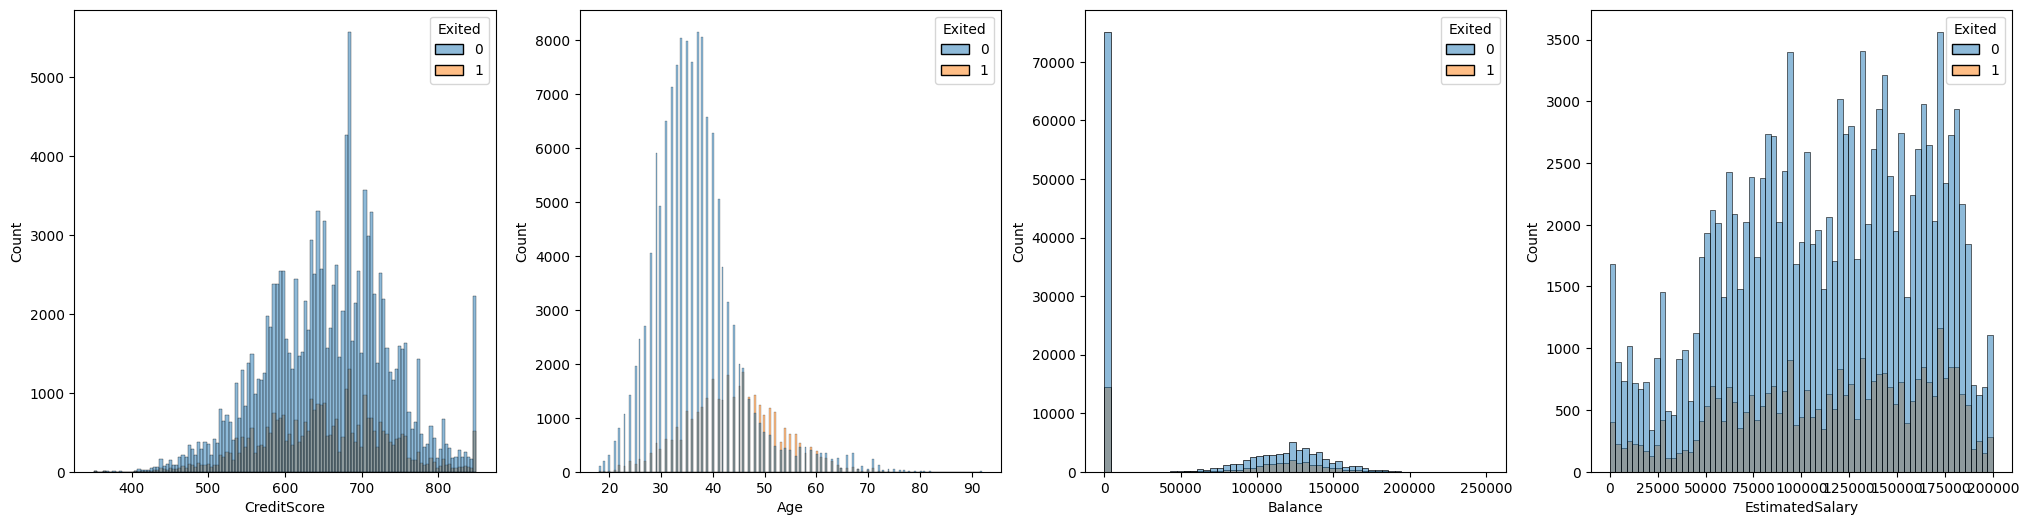

In [98]:
fig, ax = plt.subplots(1, 4, figsize=(25,6))

sns.histplot(x=train_data['CreditScore'], data=train_data, hue='Exited', ax=ax[0])
sns.histplot(x=train_data['Age'], data=train_data, hue='Exited', ax=ax[1])
sns.histplot(x=train_data['Balance'], data=train_data, hue='Exited', ax=ax[2])
sns.histplot(x=train_data['EstimatedSalary'], data=train_data, hue='Exited', ax=ax[3])

##### We looked at these continous features above, we can see that:
1. Credit score so far doesn't look like that the lower the higher churn. Need to understand more
2. It looks like there are a lot of 45+ people churn. In fact 45 -> 70
3. As of balance, there are a lot of people have balance of 0. But it doesn't indicate that it's more likely to churn
4. For the salary indicator, it's not obvious which group is more likely to churn

##### After plotting all the features, there are some features that provide obvious churn information:
1. Age, 45 - 70 age group seesm to churn more
2. Customers in Germany churned more than France and Spain
3. Customers who have only 2 products seem to churn less and Customers who have 3-4 products are churned more 
4. Customers who have credit cards churned less
5. Female customers seem to churn more

##### Now lets plot the heatmap of the correlation of different features

In [99]:
train_data['gender_number'] =  train_data.replace({'Male':0, 'Female':1})['Gender']

train_data['geography_number'] =  train_data.replace({'France':0, 'Germany':1, 'Spain':2})['Geography']

/var/folders/08/0mmxpjds48s_7kghtt0p4y9c0000gn/T/ipykernel_62396/1207814139.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['gender_number'] =  train_data.replace({'Male':0, 'Female':1})['Gender']
/var/folders/08/0mmxpjds48s_7kghtt0p4y9c0000gn/T/ipykernel_62396/1207814139.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['geography_number'] =  train_data.replace({'France':0, 'Germany':1, 'Spain':2})['Geography']


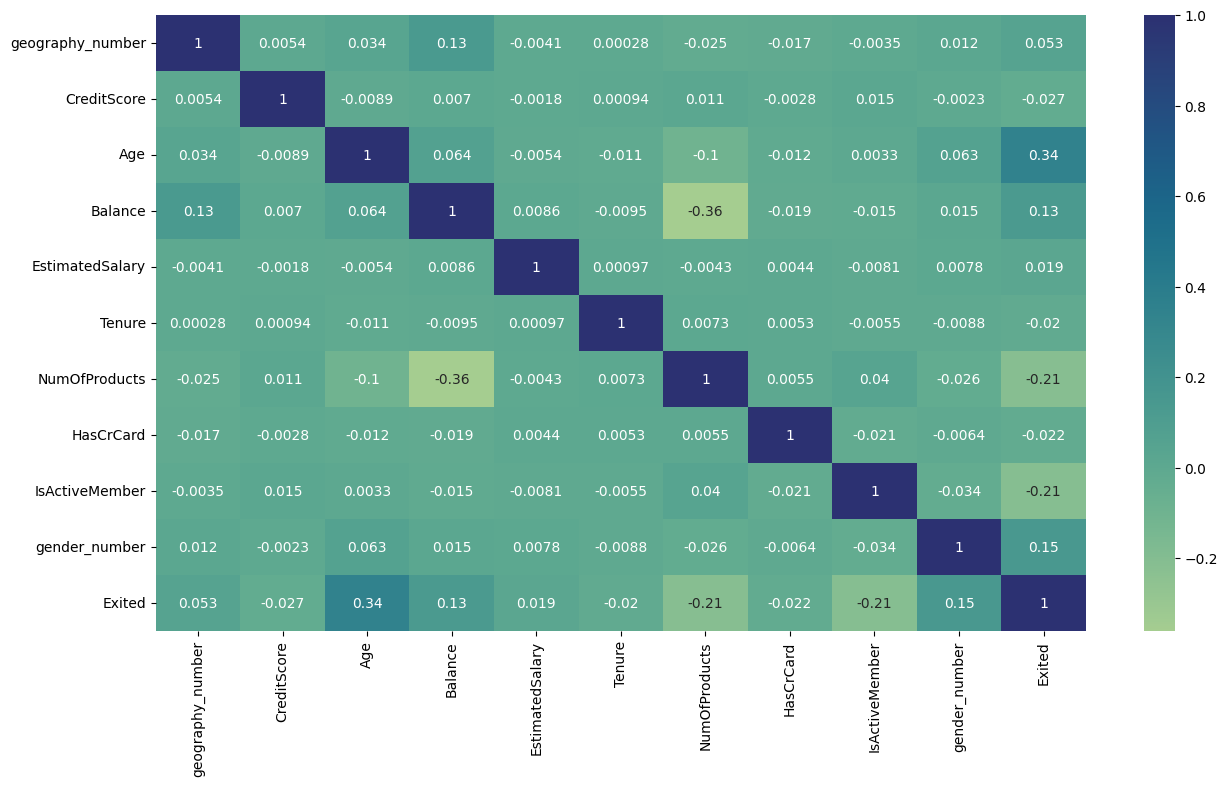

In [100]:
fig, ax = plt.subplots(figsize=(15,8))
features_for_corr = ['geography_number', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'gender_number','Exited']
sns.heatmap(train_data[features_for_corr].corr(), annot=True, cmap='crest')
plt.show()

From the correlation heatmap, we can see that Age is the highest correlated (positive) feature amongest all the features.
then Number of products and is active customer (negative)

Age >> Number of products = is active (negative) >> gender >> balance 

/Users/zoechen/Library/Caches/pypoetry/virtualenvs/bank-churn-jzBMeYPH-py3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


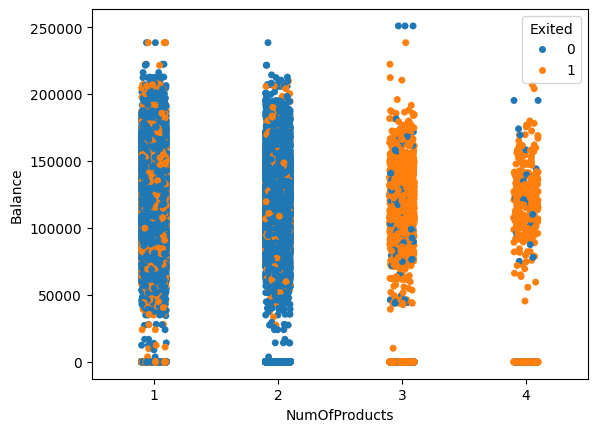

In [101]:
sns.stripplot(x='NumOfProducts', y='Balance', data=train_data, hue='Exited')
plt.show()

We are seeing a -0.36 correlation with balance and number of products in the heatmap. Lets draw out the distrubition as above strip plot. We can see that`; Higher balance doesn't seem to have more than 2 products. Maybe that's why it's given the higher correlation. 

Maybe we can combine the two features in the modelling

/Users/zoechen/Library/Caches/pypoetry/virtualenvs/bank-churn-jzBMeYPH-py3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/zoechen/Library/Caches/pypoetry/virtualenvs/bank-churn-jzBMeYPH-py3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/zoechen/Library/Caches/pypoetry/virtualenvs/bank-churn-jzBMeYPH-py3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future versi

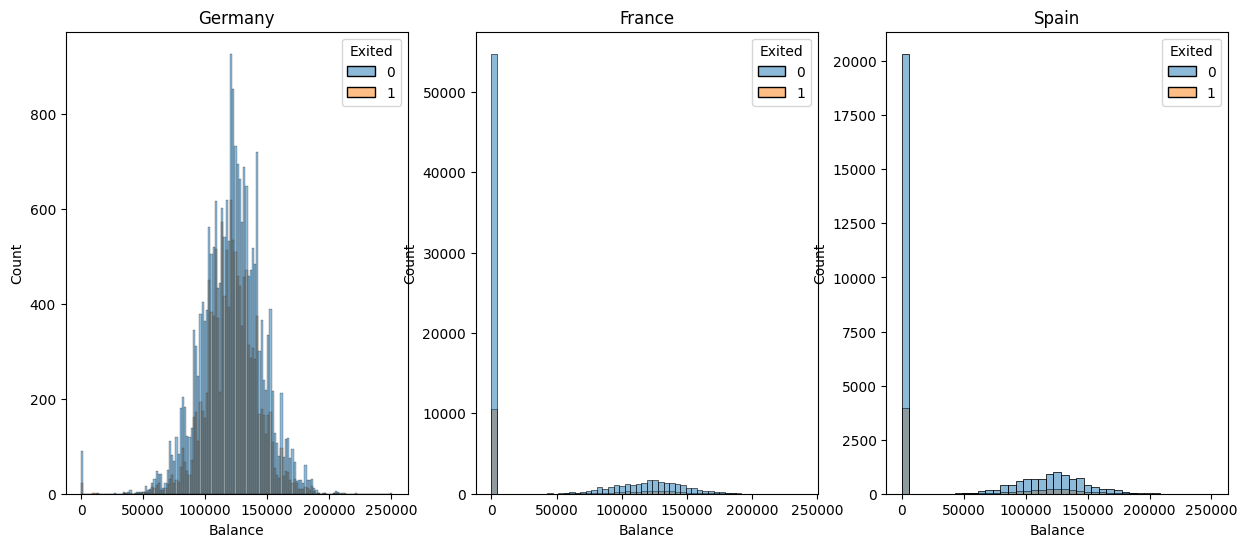

In [102]:
# we saw that balance and gerography is somewhat correlated. we can plot what it is looks like
fig, ax = plt.subplots(1, 3, figsize=(15,6))
sns.histplot(x=train_data.loc[train_data['Geography'] == 'Germany'].Balance, data=train_data, hue='Exited', ax=ax[0])
sns.histplot(x=train_data.loc[train_data['Geography'] == 'France'].Balance, data=train_data, hue='Exited', ax=ax[1])
sns.histplot(x=train_data.loc[train_data['Geography'] == 'Spain'].Balance, data=train_data, hue='Exited', ax=ax[2])

ax[0].set_title('Germany')
ax[1].set_title('France')
ax[2].set_title('Spain')
plt.show() 

From above we can see Germany has really high balance, and they churn a lot. Maybe the churn for Germany is more related to the balance situation rather than the geography (we don't know).

##### In summary:
for the key metrics, the leading metrics to churn can be:
Age >> Number of products = is active (negative) >> gender >> balance 

We can also engineer some features to improve the performance:
1. Number of products with balance
2. Geography with balance

In [103]:
## look a bit at surname to see if there is any trends. It's harder to understand though,but we can plot the top surnames and have a look.
top_100_name = train_data['Surname'].value_counts().sort_values(ascending=False).head(50).index.to_list()

# write a code to replace all the name except top 100 with 'Other' using lambada function
train_data['SurnameGrouped'] = train_data['Surname'].apply(lambda x: x if x in top_100_name else 'Other')

/Users/zoechen/Library/Caches/pypoetry/virtualenvs/bank-churn-jzBMeYPH-py3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/zoechen/Library/Caches/pypoetry/virtualenvs/bank-churn-jzBMeYPH-py3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


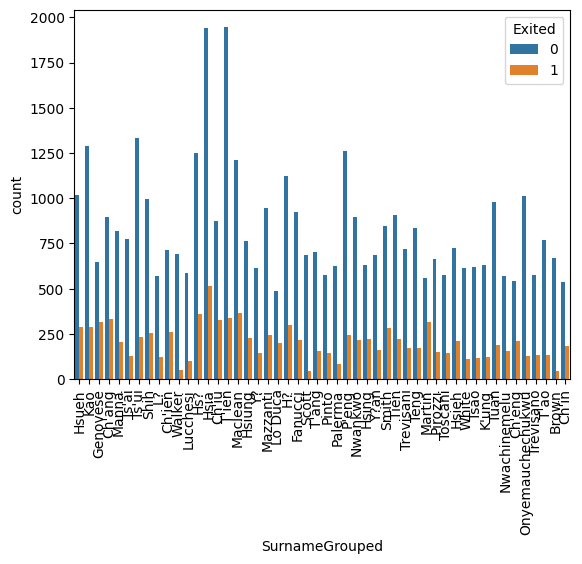

In [104]:
sns.countplot(x='SurnameGrouped', hue='Exited', data=train_data.loc[train_data['SurnameGrouped'] != 'Other'])
plt.xticks(rotation=90)
plt.show()

##### The abpve doesn't really give any useful information. Question for late improvement: 
What is the best way to understand the surname and target? can we find some way to analyze how same surname impact the churn?

# Step 5: Modelling

In this step, you will use ML to predict the dataset. 

In [105]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_number,geography_number,SurnameGrouped
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,0,Other
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,0,Other
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,0,Hsueh
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0,Kao
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,2,Other


### Precessing the data

In [106]:
# The following columns are not useful for now, so we will remove them
train_data.drop(['Surname', 'SurnameGrouped', 'id', 'CustomerId', 'geography_number', 'gender_number'], axis=1, inplace=True)

In [107]:
# rearrange the columns of the dataframe -> mainly to make it easier to encode the columns
cols = ['Geography', 'Gender', 'NumOfProducts', 'Tenure', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']

train_data = train_data[cols]

train_data.head()

,Geography,Gender,NumOfProducts,Tenure,HasCrCard,IsActiveMember,CreditScore,Age,Balance,EstimatedSalary,Exited
0,France,Male,2,3,1.0,0.0,668,33.0,0.00,181449.97,0
1,France,Male,2,1,1.0,1.0,627,33.0,0.00,49503.50,0
2,France,Male,2,10,1.0,0.0,678,40.0,0.00,184866.69,0
3,France,Male,1,2,1.0,1.0,581,34.0,148882.54,84560.88,0
4,Spain,Male,2,5,1.0,1.0,716,33.0,0.00,15068.83,0


In [108]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# set the format of numpy array to 2 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

# one hot encoding the categorical fields
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2])], remainder='passthrough')


train = np.array(ct.fit_transform(train_data))

train[:10, 0:10]

array([[1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 3.00],
       [1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 1.00],
       [1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 10.00],
       [1.00, 0.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 2.00],
       [0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 5.00],
       [0.00, 1.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 4.00],
       [1.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00, 8.00],
       [0.00, 0.00, 1.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 1.00],
       [1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 4.00],
       [0.00, 1.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 4.00]])

In [109]:
train.shape

(165034, 17)

In [110]:
# after encoding, the column headers are lost, but we can print out the feature names to understand which column is what
ct.get_feature_names_out()

array(['encoder__Geography_France', 'encoder__Geography_Germany',
       'encoder__Geography_Spain', 'encoder__Gender_Female',
       'encoder__Gender_Male', 'encoder__NumOfProducts_1',
       'encoder__NumOfProducts_2', 'encoder__NumOfProducts_3',
       'encoder__NumOfProducts_4', 'remainder__Tenure',
       'remainder__HasCrCard', 'remainder__IsActiveMember',
       'remainder__CreditScore', 'remainder__Age', 'remainder__Balance',
       'remainder__EstimatedSalary', 'remainder__Exited'], dtype=object)

In [111]:
from sklearn.model_selection import train_test_split
trains, test = train_test_split(train, test_size=0.2, random_state=42)

X_train = trains[:, :-1]
y_train = trains[:, -1]
X_test = test[:, :-1]
y_test = test[:, -1]

In [112]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((132027, 16), (132027,), (33007, 16), (33007,))

In [113]:
y_test

array([0.00, 0.00, 1.00, ..., 0.00, 0.00, 0.00])

### Feature Scaling

We are going to do feature scaling to bring all the features to the same scale, as we can see that balance unit is too large compare to other features. 
Here lets just do StandScaler

In [114]:
# From above analysis the balance and estimated salary is skewed, we can use log transformation to make it normal distribution
# As log transfermation can't be applied to 0, we will add 1 to the column before applying log transformation
X_train[:, 14:16] = np.log1p(X_train[:, 14:16])
X_test[:, 14:16] = np.log1p(X_test[:, 14:16])

In [115]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train[:, 9:] = sc.fit_transform(X_train[:, 9:])
X_test[:, 9:] = sc.transform(X_test[:, 9:])

X_train


array([[1.00, 0.00, 0.00, ..., 0.32, -0.92, 0.13],
       [1.00, 0.00, 0.00, ..., 0.89, 1.08, 0.12],
       [1.00, 0.00, 0.00, ..., -0.35, -0.92, 0.63],
       ...,
       [1.00, 0.00, 0.00, ..., 0.10, -0.92, 0.72],
       [1.00, 0.00, 0.00, ..., 1.11, -0.92, -1.60],
       [0.00, 1.00, 0.00, ..., -0.35, 1.11, 0.50]])

In [116]:
X_test[:3, :]

array([[1.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00, 1.06, 0.57,
        -0.99, 1.76, -0.80, 1.06, -0.19],
       [1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 0.35, 0.57,
        -0.99, -0.35, -1.37, -0.92, -1.08],
       [1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.70, 0.57,
        -0.99, -1.15, 0.10, 1.08, -0.36]])

#### churn is classfication problem, so we will choose classfication models

In [125]:
# the models we will use to train the data and test the accuracy 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# we will use the following metrics to evaluate the models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, f1_score

In [126]:
model_names = list()
accuracy_scores = list()
roc_auc_scores = list()
f1_scores = list()

ml_models = [
    LogisticRegression(random_state=42), 
    DecisionTreeClassifier(random_state=42), 
    #SVC(random_state=42), 
    GradientBoostingClassifier(random_state=42), 
    RandomForestClassifier(random_state=42), 
    XGBClassifier(random_state=42)]

# train the models and test the accuracy
for model in ml_models:
    # train the model and predict the test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # calculate the accuracy, roc_auc, and f1 scores
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # append the scores to the list
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)
    f1_scores.append(f1)

In [128]:
model_results = pd.DataFrame({'model_names': model_names, 'accuracy_scores': accuracy_scores, 'roc_auc_scores': roc_auc_scores, 'f1_scores': f1_scores}).sort_values(by='accuracy_scores', ascending=False)
model_results

,model_names,accuracy_scores,roc_auc_scores,f1_scores
2,GradientBoostingClassifier,0.866180,0.749491,0.633048
4,XGBClassifier,0.865604,0.756241,0.640110
3,RandomForestClassifier,0.857970,0.743183,0.617805
0,LogisticRegression,0.857212,0.734061,0.606035
1,DecisionTreeClassifier,0.797407,0.702183,0.527921


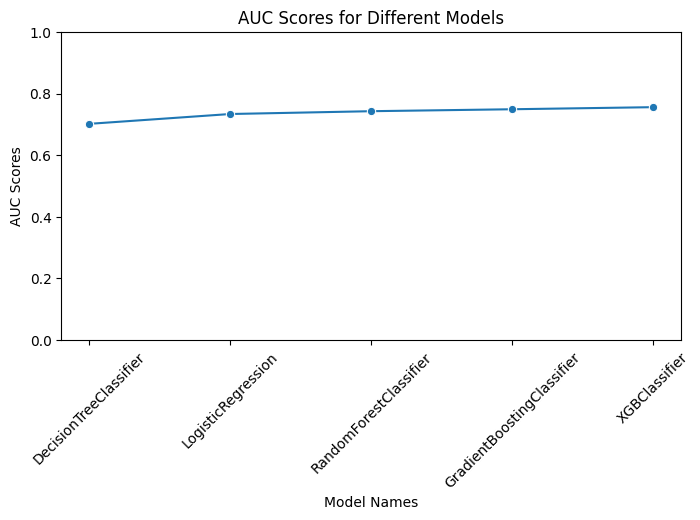

In [143]:
# plot the auc curve for the models

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x='model_names', y='roc_auc_scores', data=model_results.sort_values(by='roc_auc_scores'), marker='o')
plt.title('AUC Scores for Different Models')
plt.xlabel('Model Names')
plt.ylabel('AUC Scores')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.show()

From the results above, lets use XGBoost as the best model to fine tune our model.

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_y_pred)

lr_accuracy_score = accuracy_score(y_test, lr_y_pred)
target_names = ['Not Churned', 'Churned']
lr_classification_report = classification_report(y_test, lr_y_pred, target_names=target_names)

In [120]:
print(f"The logistic regression accuracy: {lr_accuracy_score}")
print("\nLogistic regresssion classification report:\n")
print(lr_classification_report)

The logistic regression accuracy: 0.8572121065228588

Logistic regresssion classification report:

              precision    recall  f1-score   support

 Not Churned       0.88      0.95      0.91     26052
     Churned       0.72      0.52      0.61      6955

    accuracy                           0.86     33007
   macro avg       0.80      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007



In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='log_loss', random_state=0) # choose the criterion as log_loss because it has higher accuracy than gini and entropy
dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_accuracy_score = accuracy_score(y_test, dt_y_pred)
dt_classification_report = classification_report(y_test, dt_y_pred, target_names=target_names)

In [43]:
print(f"The Decision Tree accuracy: {dt_accuracy_score}")
print("\nDecision Tree classification report:\n")
print(dt_classification_report)

The Decision Tree accuracy: 0.7992244069439816

Decision Tree classification report:

              precision    recall  f1-score   support

 Not Churned       0.88      0.87      0.87     26052
     Churned       0.52      0.54      0.53      6955

    accuracy                           0.80     33007
   macro avg       0.70      0.70      0.70     33007
weighted avg       0.80      0.80      0.80     33007



In [44]:
from sklearn.svm import SVC

svc_classifier = SVC(random_state=0)  # choose the defualt kernel as rbf
svc_classifier.fit(X_train, y_train)

svc_y_pred = svc_classifier.predict(X_test)
svc_cm = confusion_matrix(y_test, svc_y_pred)
svc_accuracy_score = accuracy_score(y_test, svc_y_pred)
svc_classification_report = classification_report(y_test, svc_y_pred, target_names=target_names)

In [45]:
print(f"The SVC accuracy: {svc_accuracy_score}")
print("\nSVC classification report:\n")
print(svc_classification_report)

The SVC accuracy: 0.8635440967067591

SVC classification report:

              precision    recall  f1-score   support

 Not Churned       0.88      0.96      0.92     26052
     Churned       0.78      0.49      0.60      6955

    accuracy                           0.86     33007
   macro avg       0.83      0.73      0.76     33007
weighted avg       0.86      0.86      0.85     33007



So far we can see that the svc model gives better result with higher accuray as well as f1-score

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='log_loss', random_state=0)
rfc.fit(X_train, y_train)

rfc_y_pred = rfc.predict(X_test)
rfc_cm = confusion_matrix(y_test, rfc_y_pred)
rfc_accuracy_score = accuracy_score(y_test, rfc_y_pred)
rfc_classification_report = classification_report(y_test, rfc_y_pred, target_names=target_names)

In [47]:
print(f"The random forest accuracy: {rfc_accuracy_score}")
print("\nRandom forest report:\n")
print(rfc_classification_report)

The random forest accuracy: 0.8581815978428818

Random forest report:

              precision    recall  f1-score   support

 Not Churned       0.89      0.94      0.91     26052
     Churned       0.72      0.54      0.62      6955

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007



In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=1)
gbc.fit(X_train, y_train)

gbc_y_pred = gbc.predict(X_test)
gbc_cm = confusion_matrix(y_test, gbc_y_pred)
gbc_accuracy_score = accuracy_score(y_test, gbc_y_pred)
gbc_classification_report = classification_report(y_test, gbc_y_pred, target_names=target_names)


In [49]:
print(f"The Gradient Boosting accuracy: {gbc_accuracy_score}")
print("\nGradient Boostingreport:\n")
print(gbc_classification_report)

The Gradient Boosting accuracy: 0.8655436725543066

Gradient Boostingreport:

              precision    recall  f1-score   support

 Not Churned       0.89      0.95      0.92     26052
     Churned       0.74      0.55      0.63      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



After a few model check, we can see that XGboost, GradientBoost, Support Vector Machine and Random Forest have better accuracy. 

We can try to fine-tune the models to see if we can improve the accuracy

### Fine Tune XGboost

Here I will try fine tune the hyper parameters using HyperOpt

In [53]:
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe, hp, fmin, Trials, STATUS_OK

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [147]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [144]:
from sklearn.model_selection import GridSearchCV

In [148]:
ct.get_feature_names_out()[:-1]

array(['encoder__Geography_France', 'encoder__Geography_Germany',
       'encoder__Geography_Spain', 'encoder__Gender_Female',
       'encoder__Gender_Male', 'encoder__NumOfProducts_1',
       'encoder__NumOfProducts_2', 'encoder__NumOfProducts_3',
       'encoder__NumOfProducts_4', 'remainder__Tenure',
       'remainder__HasCrCard', 'remainder__IsActiveMember',
       'remainder__CreditScore', 'remainder__Age', 'remainder__Balance',
       'remainder__EstimatedSalary'], dtype=object)

In [149]:
xgb.feature_importances_

array([0.00, 0.05, 0.00, 0.02, 0.00, 0.08, 0.66, 0.01, 0.00, 0.00, 0.00,
       0.10, 0.00, 0.05, 0.01, 0.00], dtype=float32)

In [151]:
# check which features are important for the model
feature_importance = pd.DataFrame({'feature': ct.get_feature_names_out()[:-1], 'importance': xgb.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
6,encoder__NumOfProducts_2,0.662045
11,remainder__IsActiveMember,0.095399
5,encoder__NumOfProducts_1,0.080692
1,encoder__Geography_Germany,0.050725
13,remainder__Age,0.046208
3,encoder__Gender_Female,0.019019
14,remainder__Balance,0.011788
7,encoder__NumOfProducts_3,0.006138
10,remainder__HasCrCard,0.004818
12,remainder__CreditScore,0.004604


In [152]:
param_test1 = {'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)}

gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=10),  param_grid=param_test1, scoring='roc_auc', n_jobs=4, cv=5)
gsearch1.fit(X_train, y_train)

print(gsearch1.scorer_)

print("\nBest parameters:\n")
print(gsearch1.best_params_)
print("\nBest Score:\n")
print(gsearch1.best_score_)

make_scorer(roc_auc_score, response_method=('decision_function', 'predict_proba'))

Best parameters:

{'max_depth': 7, 'min_child_weight': 5}

Best Score:

0.8858586612104423


In [153]:
param_test2 = {'n_estimators':range(1,100,10)}

gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=10, max_depth=7, min_child_weight=3),  param_grid=param_test2, scoring='roc_auc', n_jobs=4, cv=5)
gsearch2.fit(X_train, y_train)

print(gsearch2.scorer_)

print("\nBest parameters:\n")
print(gsearch2.best_params_)
print("\nBest Score:\n")
print(gsearch2.best_score_)

make_scorer(roc_auc_score, response_method=('decision_function', 'predict_proba'))

Best parameters:

{'n_estimators': 71}

Best Score:

0.8878650220580987


In [154]:
param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}

gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=81, max_depth=7, min_child_weight=3),  param_grid=param_test3, scoring='roc_auc', n_jobs=4, cv=5)
gsearch3.fit(X_train, y_train)

print(gsearch3.scorer_)

print("\nBest parameters:\n")
print(gsearch3.best_params_)
print("\nBest Score:\n")
print(gsearch3.best_score_)

make_scorer(roc_auc_score, response_method=('decision_function', 'predict_proba'))

Best parameters:

{'gamma': 0.0}

Best Score:

0.8878597263350387


In [155]:
param_test4 = {'learning_rate':[i/10.0 for i in range(0,5)]}

gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=81, max_depth=7, min_child_weight=3, gamma=0.4),  param_grid=param_test4, scoring='roc_auc', n_jobs=4, cv=5)
gsearch4.fit(X_train, y_train)

print(gsearch4.scorer_)

print("\nBest parameters:\n")
print(gsearch4.best_params_)
print("\nBest Score:\n")
print(gsearch4.best_score_)

make_scorer(roc_auc_score, response_method=('decision_function', 'predict_proba'))

Best parameters:

{'learning_rate': 0.1}

Best Score:

0.8877708942497511


In [63]:
# param_test4 = {
# # 'subsample':[i/100.0 for i in range(75,90,5)],
# # 'colsample_bytree':[i/100.0 for i in range(75,90,5)],
# 'gamma':[0.1, 1, 5, 10, 50],
# 'scale_pos_weight': [5, 7, 9],
# 'max_depth': [1, 5, 7, 8, 10, 15],
# 'min_child_weight': [1, 3, 5, 7],
# 'reg_alpha':[0, 1, 5, 10, 15],
# }

# gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=81, max_depth=7, min_child_weight=3, gamma=0.4, reg_alpha=0.01),  param_grid=param_test4, scoring='roc_auc', n_jobs=4, cv=5)
# gsearch4.fit(X_train, y_train)

# print(gsearch4.scorer_)

# print("\nBest parameters:\n")
# print(gsearch4.best_params_)
# print("\nBest Score:\n")
# print(gsearch4.best_score_)

### Final model

In [157]:
xgb = XGBClassifier(learning_rate =0.1, max_depth=7, min_child_weight=5, gamma=0.3, subsample=0.9, colsample_bytree=0.5, reg_alpha=0.001, n_estimators=71)
xgb.fit(X_train, y_train)

xgb_y_pred = xgb.predict(X_test)
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
xgb_accuracy_score = accuracy_score(y_test, xgb_y_pred)
xgb_classification_report = classification_report(y_test, xgb_y_pred, target_names=target_names)

In [158]:
print(f"The XGBoost accuracy: {xgb_accuracy_score}")
print("\nXGBoost report:\n")
print(xgb_classification_report)

The XGBoost accuracy: 0.8676644348168571

XGBoost report:

              precision    recall  f1-score   support

 Not Churned       0.89      0.95      0.92     26052
     Churned       0.75      0.55      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



In [159]:
xgb_cm


array([[24780,  1272],
       [ 3096,  3859]])

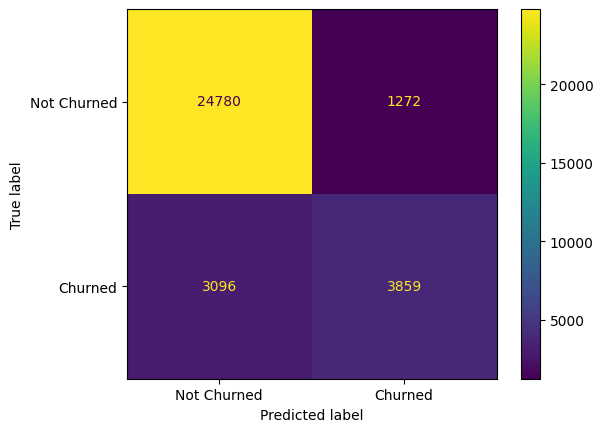

In [160]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=target_names)

disp.plot()

plt.show()


In [162]:
feature_importance = pd.DataFrame({'feature': ct.get_feature_names_out()[:-1], 'importance': xgb.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
6,encoder__NumOfProducts_2,0.368216
11,remainder__IsActiveMember,0.217187
5,encoder__NumOfProducts_1,0.148233
7,encoder__NumOfProducts_3,0.089333
13,remainder__Age,0.048160
1,encoder__Geography_Germany,0.043775
3,encoder__Gender_Female,0.016417
2,encoder__Geography_Spain,0.015700
8,encoder__NumOfProducts_4,0.015670
0,encoder__Geography_France,0.010115


#### Plot the XGBoost Tree

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

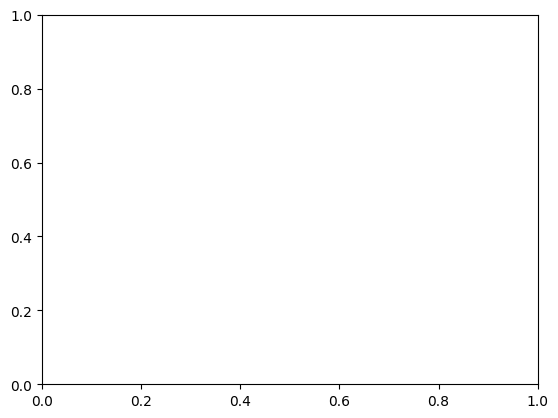

In [164]:
from xgboost import plot_tree

plot_tree(xgb, num_trees=0, rankdir='LR')
plt.show()

#### Submission

In [166]:
submission_df = pd.read_csv('test.csv')

submission_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [167]:
submission_df.shape

(110023, 13)

In [168]:
submission_result = submission_df['id']

In [169]:
submission_df.drop(['Surname', 'id', 'CustomerId'], axis=1, inplace=True)
submission_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [170]:
# rearrange the columns of the dataframe
sub_cols = ['Geography', 'Gender', 'NumOfProducts', 'Tenure', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

submission_df = submission_df[sub_cols]

submission_df.head()

,Geography,Gender,NumOfProducts,Tenure,HasCrCard,IsActiveMember,CreditScore,Age,Balance,EstimatedSalary
0,France,Female,2,2,0.0,1.0,586,23.0,0.00,160976.75
1,France,Female,1,2,1.0,0.0,683,46.0,0.00,72549.27
2,France,Female,2,7,1.0,0.0,656,34.0,0.00,138882.09
3,France,Male,1,8,1.0,0.0,681,36.0,0.00,113931.57
4,Germany,Male,1,10,1.0,0.0,752,38.0,121263.62,139431.00


In [171]:
submission_df['Exited'] = 1

In [172]:
# apply same encoding as the train dataset

submission_df_test = np.array(ct.transform(submission_df))

submission_df_test[:10, :]

array([[1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 2.00, 0.00,
        1.00, 586.00, 23.00, 0.00, 160976.75, 1.00],
       [1.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00, 2.00, 1.00,
        0.00, 683.00, 46.00, 0.00, 72549.27, 1.00],
       [1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 7.00, 1.00,
        0.00, 656.00, 34.00, 0.00, 138882.09, 1.00],
       [1.00, 0.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 8.00, 1.00,
        0.00, 681.00, 36.00, 0.00, 113931.57, 1.00],
       [0.00, 1.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 10.00,
        1.00, 0.00, 752.00, 38.00, 121263.62, 139431.00, 1.00],
       [1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 9.00, 0.00,
        0.00, 593.00, 22.00, 0.00, 51907.72, 1.00],
       [0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 4.00, 1.00,
        1.00, 682.00, 45.00, 0.00, 157878.67, 1.00],
       [0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 8.00, 1.00,
        1.00, 539.00, 47.00, 0.00

In [173]:
# remove the exited column from the submission dataset
submission_df_test = np.delete(submission_df_test, 16, 1)
submission_df_test.shape

(110023, 16)

In [174]:
# apply the log transformation and standard scaler to the submission dataset
submission_df_test[:, 14:16] = np.log1p(submission_df_test[:, 14:16])

In [175]:
# apply same scaling as the train dataset
submission_df_test[:, 9:] = sc.transform(submission_df_test[:, 9:])

In [176]:
submission_df_test[:10, :]

array([[1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, -1.08,
        -1.75, 1.01, -0.88, -1.70, -0.92, 0.67],
       [1.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00, -1.08,
        0.57, -0.99, 0.33, 0.89, -0.92, -0.30],
       [1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.70, 0.57,
        -0.99, -0.01, -0.46, -0.92, 0.49],
       [1.00, 0.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 1.06, 0.57,
        -0.99, 0.30, -0.24, -0.92, 0.25],
       [0.00, 1.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 1.77, 0.57,
        -0.99, 1.19, -0.01, 1.09, 0.49],
       [1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.42,
        -1.75, -0.99, -0.80, -1.82, -0.92, -0.71],
       [0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, -0.36,
        0.57, 1.01, 0.32, 0.78, -0.92, 0.65],
       [0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.06, 0.57,
        1.01, -1.47, 1.00, -0.92, 0.38],
       [1.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00, -0.72,

In [177]:
pred_prob = xgb.predict_proba(submission_df_test)[:, 1]

In [178]:
pred_prob

array([0.03, 0.83, 0.03, ..., 0.02, 0.15, 0.18], dtype=float32)

In [179]:
submission_df['Exited'] = pred_prob

In [180]:
submission_df

,Geography,Gender,NumOfProducts,Tenure,HasCrCard,IsActiveMember,CreditScore,Age,Balance,EstimatedSalary,Exited
0,France,Female,2,2,0.0,1.0,586,23.0,0.00,160976.75,0.033801
1,France,Female,1,2,1.0,0.0,683,46.0,0.00,72549.27,0.830195
2,France,Female,2,7,1.0,0.0,656,34.0,0.00,138882.09,0.027972
3,France,Male,1,8,1.0,0.0,681,36.0,0.00,113931.57,0.221724
4,Germany,Male,1,10,1.0,0.0,752,38.0,121263.62,139431.00,0.353595
...,...,...,...,...,...,...,...,...,...,...,...
110018,Spain,Male,1,7,1.0,1.0,570,29.0,116099.82,148087.62,0.048104
110019,France,Female,1,4,1.0,1.0,575,36.0,178032.53,42181.68,0.111697
110020,France,Male,2,2,1.0,0.0,712,31.0,0.00,16287.38,0.022957
110021,France,Female,1,3,1.0,1.0,709,32.0,0.00,158816.58,0.154243


In [181]:
submission = pd.read_csv('test.csv')
submission['Exited'] = pred_prob

In [182]:
submission_result = submission[['id', 'Exited']]

In [183]:
submission_result.to_csv('submission.csv', index=False)